# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [40]:
import pandas as pd
import os 

In [128]:
path = os.getcwd()
full_path = os.path.join(path,"fruit")
files = os.listdir(full_path)
files = files[0:-2]
fruit_name = [f[:-5] for f in files]
fruit_name = pd.Series(fruit_name, name = 'food')
type = pd.Series(['fruit']*len(fruit_name), name = 'type')

In [129]:
df = pd.DataFrame()
for i in range(len(files)):
    path = os.path.join(full_path, files[i])
    file_xls = pd.read_excel(path,header = 1)
    content = pd.Series(file_xls.iloc[1,[0,1,3,4,6]],name = i)
    df = pd.concat([df,content],axis = 1)
fruit = pd.concat([type,fruit_name,df.T],axis = 1)
# extract the "Fresh" rows
fruit = fruit.loc[fruit['Form'] == 'Fresh1']
# reorder the columns
fruit = fruit.iloc[:,[0,1,4,3,5,6,2]]
# rename the table
fruit.columns = ['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup']
fruit.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
5,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
6,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [188]:
path = os.getcwd()
full_path1 = os.path.join(path,"vegetables")
files1 = os.listdir(full_path1)
vege_name = [f[:-5] for f in files1]
vege_name = pd.Series(vege_name, name = 'food')
type1 = pd.Series(['vegetables']*len(vege_name), name = 'type')

In [189]:
df = pd.DataFrame()
for i in range(len(files1)):
    path = os.path.join(full_path1, files1[i])
    file_xls = pd.read_excel(path,header = 1)
    content = pd.Series(file_xls.iloc[1,[0,1,3,4,6]],name = i)
    df = pd.concat([df,content],axis = 1)
vege = pd.concat([type1,vege_name,df.T],axis = 1)
# extract the "Fresh" rows
vege = vege.loc[vege['Form'] == 'Fresh1']
# reorder the columns
vege = vege.iloc[:,[0,1,4,3,5,6,2]]
# rename the table
vege.columns = ['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup']
vege.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
1,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
2,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
3,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
8,vegetables,brussels_sprouts,Fresh1,2.76355,1.06,0.341717,0.890898


In [178]:
vege.loc[vege['food'] == 'tomatoes']

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup


From the result, we can see the codes doesn't produce the correct prices for tomatoes. After checking, I found the form of tomatoes file is "Fresh" instead of "Fresh1", which caused the wrong result. 
Files broccoli, cabbage, carrots, cucumbers have the same problem.

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [191]:
#remove rows without a price from the vegetable data frame
vege.dropna(subset=['price_per_cup'], inplace=True)

In [193]:
#combine the fruit and vegetable data frames
table = pd.concat([fruit,vege], axis = 0)
table

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
5,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
6,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
7,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
12,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
13,fruit,grapes,Fresh1,2.09383,0.96,0.330693,0.721266
14,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077
15,fruit,kiwi,Fresh1,2.04468,0.76,0.385809,1.03797


In [194]:
# change all columns of numbers to numeric
table = table.apply(lambda x: pd.to_numeric(x, errors='ignore'))
table.dtypes

type              object
food              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [195]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

In [213]:
pri = fruit.loc[fruit['type']=='fruit']['price_per_lb']
#the most expensive fruit
print fruit.loc[fruit['price_per_lb'] == max(pri)]['food']
#the least expensive fruit
print fruit.loc[fruit['price_per_lb'] == min(pri)]['food']

25    raspberries
Name: food, dtype: object
28    watermelon
Name: food, dtype: object


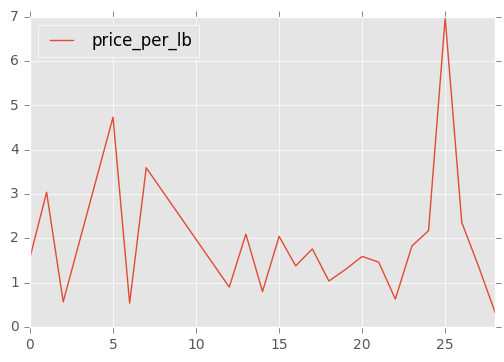

In [214]:
price = fruit[['food','price_per_lb']].groupby(level=0).sum()
price.plot(y='price_per_lb')
plt.show()

From the results we can know that the most expensive fruit is raspberries, and the least expensive fruit is watermelon. From the plot we can see the price difference are quite large.

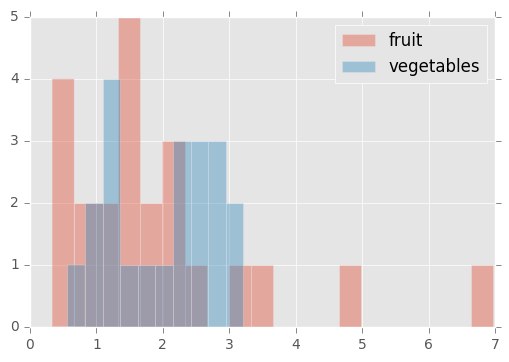

In [217]:
# How do the price distributions compare for fruit and vegetables?
plt.hist(fruit['price_per_lb'],bins=20,alpha=.4,label='fruit')
plt.hist(vege['price_per_lb'],bins=10,alpha=.4,label='vegetables')
plt.legend()
plt.show()

From the plot, we can see the distributions for fruit and vegetables. We can see the distribution for vegetables are more concentrated than for fruit. We can clearly see there are some fruits' prices are quite far from the others. At the same time, the price difference between different fruit is larger than vegetables.

In [218]:
# Which foods are the best value for the price?
pri_yield = table['price_per_lb']/ table['yield']
print table.loc[pri_yield == min(pri_yield)]['food']

print table.loc[table['price_per_cup'] == min(table['price_per_cup'])]['food']

28    watermelon
Name: food, dtype: object
35    potatoes
Name: food, dtype: object


When we use the price of per pound and yield as our criterion, the best value food is watermelon. When we use the price of per cup equivalent as the evulation criterion, the best value food is potatoes. So using different evluation methods, the results for the best value are different. 

In [ ]:
# What's something surprising about this data set?


Preparation yield factors for most food are smaller than 1, but for brussels_sprouts, collard_greens and kale are larger than 1.
For example, the preparation yield factor for collard_greens is 1.16, which means a 116 percent preparation yield from boiling or steaming trimmed collard greens, and a 16 percent gain. For grapes, the preparation yield factor is 0.96, which means the inedible stems account for 4 percent of the retail product's weight, implying a preparation yield of 96 percent, when the grapes are eaten raw. 

In [224]:
# Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.
import heapq
combin = [table.loc[pri_yield == heapq.nsmallest(5,pri_yield)[i]]['food'] for i in range(5)]
combin

[28    watermelon
 Name: food, dtype: object, 35    potatoes
 Name: food, dtype: object, 2    bananas
 Name: food, dtype: object, 6    cantaloupe
 Name: food, dtype: object, 41    sweet_potatoes
 Name: food, dtype: object]

Here we use the heap queue algorithm to select the best five combination of price, yield and nutrition food. As the result shows, they are watermelon, potatoes, bananas, cantaloupe and sweet_potatoes.